In [40]:
!pip install yandex-translate
!pip install pycountry

In [41]:
import pandas as pd
import numpy as np
import pycountry
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from yandex_translate import YandexTranslate # Используем класс YandexTranslate из модуля yandex_translate
from yandex_translate import YandexTranslateException # Используем класс YandexTranslateException из модуля yandex_translate

In [42]:
PLOT_LABEL_FONT_SIZE = 14 
# Генерация цветовой схемы
# Возвращает список цветов
def getColors(n):
    COLORS = []
    cm = plt.cm.get_cmap('hsv', n)
    for i in np.arange(n):
        COLORS.append(cm(i))
    return COLORS

In [50]:
def translate(string, translator_obj=None):
    if translator_obj == None:
        return string
    t = translator_obj.translate(string, 'en-ru')
    return t['text'][0]

In [55]:
YANDEX_API_KEY = '69a95a81-41b6-42a2-a3cf-1498f8557e70'
try:
    translate_obj = YandexTranslate(YANDEX_API_KEY)
except YandexTranslateException:
    translate_obj = None

In [60]:
def dict_sort(my_dict):
    keys = []
    values = []
    my_dict = sorted(my_dict.items(), key=lambda x:x[1], reverse=True)
    for k, v in my_dict:
        keys.append(k)
        values.append(v)
    return (keys,values)

In [61]:

df = pd.read_csv('./scrubbed.csv', escapechar='`', low_memory=False)

df['shape'].fillna('unknown', inplace=True)

In [62]:
country_label_count = pd.value_counts(df['country'].values) # Получить из таблицы список всех меток country с их количеством
for label in list(country_label_count.keys()):
    c = pycountry.countries.get(alpha_2=str(label).upper()) # Перевести код страны в полное название
    t = translate(c.name, translate_obj) # Перевести название страны на русский язык
    df = df.replace({'country':str(label)}, t)

C:\Users\Didar\AppData\Local\Temp\ipykernel_4144\256909499.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  country_label_count = pd.value_counts(df['country'].values) # Получить из таблицы список всех меток country с их количеством


YandexTranslateException: ERR_KEY_INVALID

In [63]:
shapes_label_count = pd.value_counts(df['shape'].values)
for label in list(shapes_label_count.keys()):
    t = translate(str(label), translate_obj) # Перевести название формы объекта на русский язык
    df = df.replace({'shape':str(label)}, t)

C:\Users\Didar\AppData\Local\Temp\ipykernel_4144\2159583667.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  shapes_label_count = pd.value_counts(df['shape'].values)


YandexTranslateException: ERR_KEY_INVALID

C:\Users\Didar\AppData\Local\Temp\ipykernel_4144\2375682037.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  country_count = pd.value_counts(df['country'].values, sort=True)
C:\Users\Didar\AppData\Local\Temp\ipykernel_4144\834122029.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('hsv', n)


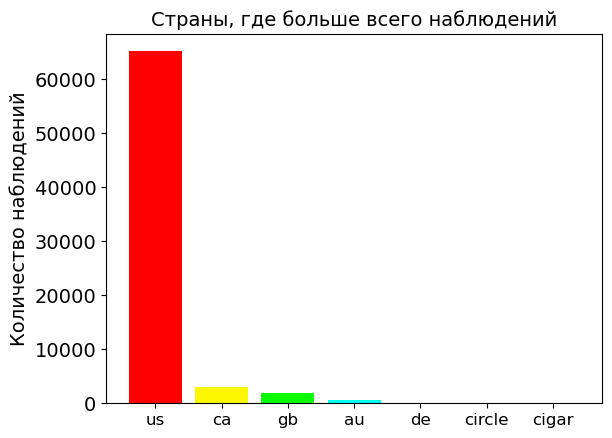

In [64]:
country_count = pd.value_counts(df['country'].values, sort=True)
country_count_keys, country_count_values = dict_sort(dict(country_count))    
TOP_COUNTRY = len(country_count_keys)
plt.title('Страны, где больше всего наблюдений', fontsize=PLOT_LABEL_FONT_SIZE)
plt.bar(np.arange(TOP_COUNTRY), country_count_values, color=getColors(TOP_COUNTRY))
plt.xticks(np.arange(TOP_COUNTRY), country_count_keys, rotation=0, fontsize=12)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Количество наблюдений', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

C:\Users\Didar\AppData\Local\Temp\ipykernel_4144\834122029.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('hsv', n)


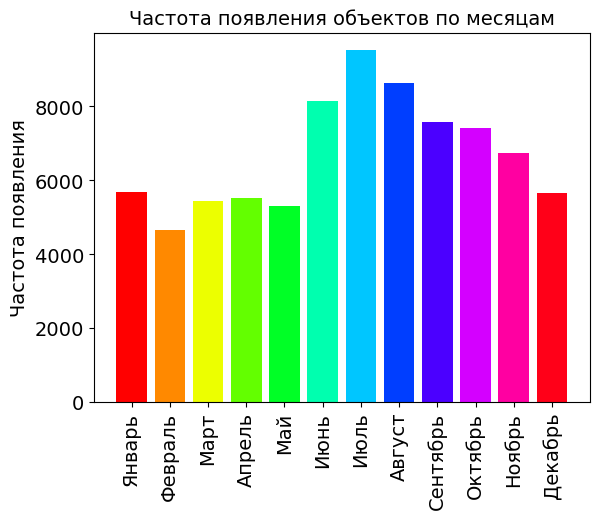

In [65]:
MONTH_COUNT = [0,0,0,0,0,0,0,0,0,0,0,0]
MONTH_LABEL = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
    'Июль', 'Август', 'Сентябрь' ,'Октябрь' ,'Ноябрь' ,'Декабрь']

for i in df['datetime']:
    m,d,y_t =  i.split('/')
    MONTH_COUNT[int(m)-1] = MONTH_COUNT[int(m)-1] + 1

plt.bar(np.arange(12), MONTH_COUNT, color=getColors(12))
plt.xticks(np.arange(12), MONTH_LABEL, rotation=90, fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Частота появления', fontsize=PLOT_LABEL_FONT_SIZE)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.title('Частота появления объектов по месяцам', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

C:\Users\Didar\AppData\Local\Temp\ipykernel_4144\834122029.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('hsv', n)


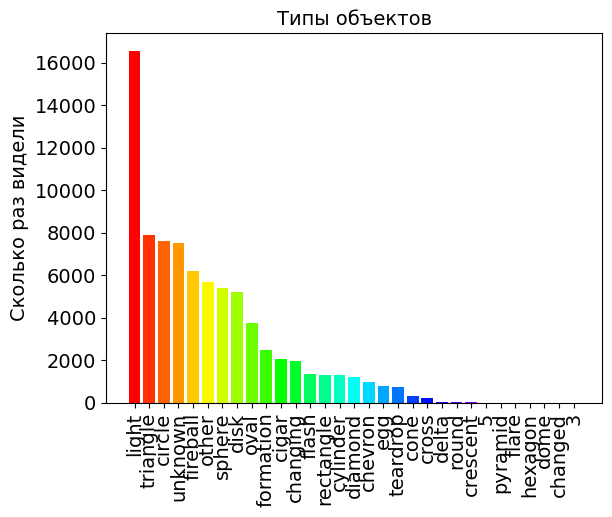

In [69]:
shapes_type_count = pd.Series(df['shape']).value_counts()
shapes_type_count_keys, shapes_type_count_values = dict_sort(dict(shapes_type_count))
OBJECT_COUNT = len(shapes_type_count_keys)
plt.title('Типы объектов', fontsize=PLOT_LABEL_FONT_SIZE)
bar = plt.bar(np.arange(OBJECT_COUNT), shapes_type_count_values, color=getColors(OBJECT_COUNT))
plt.xticks(np.arange(OBJECT_COUNT), shapes_type_count_keys, rotation=90, fontsize=PLOT_LABEL_FONT_SIZE)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Сколько раз видели', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

C:\Users\Didar\AppData\Local\Temp\ipykernel_4144\834122029.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('hsv', n)


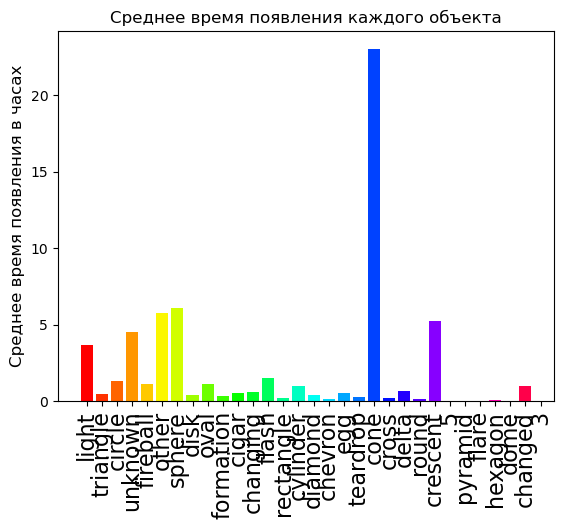

In [70]:
shapes_durations_dict = {}

# Преобразовать значения столбца 'duration (seconds)' в числовой формат и заменить некорректные значения на NaN
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')

# Вычислить среднее время для каждого типа объекта
for shape in shapes_type_count_keys:
    filtered_df = df[df['shape'] == shape]
    mean_duration_hours = filtered_df['duration (seconds)'].mean() / 3600.0  # Преобразовать в часы
    shapes_durations_dict[shape] = mean_duration_hours

# Создать списки ключей и значений для построения графика
shapes_durations_dict_keys = list(shapes_durations_dict.keys())
shapes_durations_dict_values = list(shapes_durations_dict.values())

plt.title('Среднее время появления каждого объекта', fontsize=12)
plt.bar(np.arange(OBJECT_COUNT), shapes_durations_dict_values, color=getColors(OBJECT_COUNT))
plt.xticks(np.arange(OBJECT_COUNT), shapes_durations_dict_keys, rotation=90, fontsize=16)
plt.ylabel('Среднее время появления в часах', fontsize=12)
plt.show()


C:\Users\Didar\AppData\Local\Temp\ipykernel_4144\834122029.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('hsv', n)


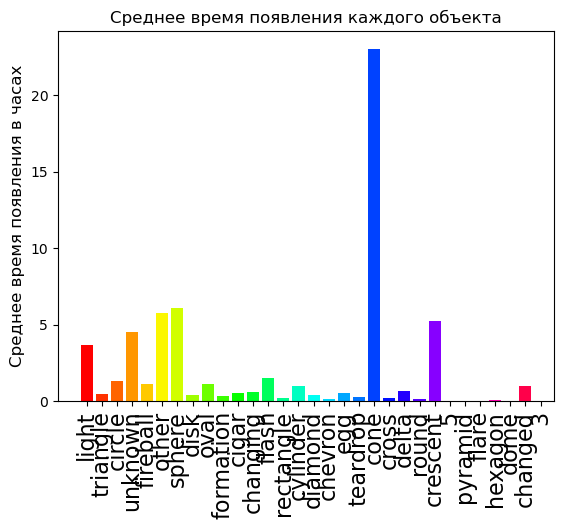

In [72]:
shapes_durations_dict = {}


df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')


for shape in shapes_type_count_keys:
    filtered_df = df[df['shape'] == shape]
    mean_duration_hours = filtered_df['duration (seconds)'].mean() / 3600.0  # Преобразовать в часы
    shapes_durations_dict[shape] = mean_duration_hours


shapes_durations_dict_keys = list(shapes_durations_dict.keys())
shapes_durations_dict_values = list(shapes_durations_dict.values())

plt.title('Среднее время появления каждого объекта', fontsize=12)
plt.bar(np.arange(OBJECT_COUNT), shapes_durations_dict_values, color=getColors(OBJECT_COUNT))
plt.xticks(np.arange(OBJECT_COUNT), shapes_durations_dict_keys, rotation=90, fontsize=16)
plt.ylabel('Среднее время появления в часах', fontsize=12)
plt.show()


C:\Users\Didar\AppData\Local\Temp\ipykernel_4144\834122029.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('hsv', n)


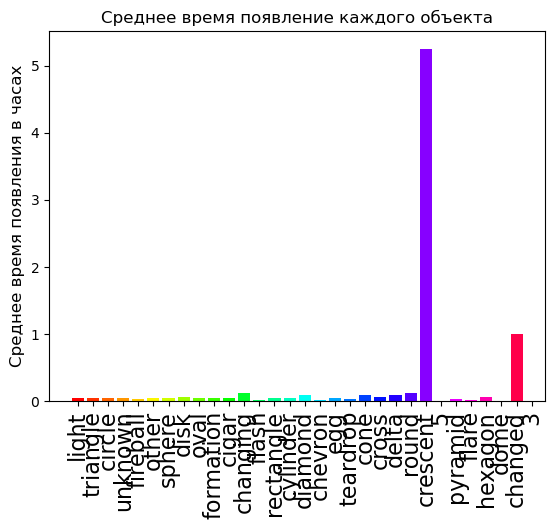

In [73]:
shapes_durations_dict = {}
for i in shapes_type_count_keys:
    dfs = df[['duration (seconds)', 'shape']].loc[df['shape'] == i]
    shapes_durations_dict[i] = dfs['duration (seconds)'].median(axis=0)/60.0/60.0

shapes_durations_dict_keys = []
shapes_durations_dict_values = []

for k in shapes_type_count_keys:
    shapes_durations_dict_keys.append(k)
    shapes_durations_dict_values.append(shapes_durations_dict[k])
plt.title('Среднее время появление каждого объекта', fontsize=12)
plt.bar(np.arange(OBJECT_COUNT), shapes_durations_dict_values, color=getColors(OBJECT_COUNT))
plt.xticks(np.arange(OBJECT_COUNT), shapes_durations_dict_keys, rotation=90, fontsize=16)
plt.ylabel('Среднее время появления в часах', fontsize=12)
plt.show()